In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from datetime import date

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/JP 3M.csv")
df1.rename(columns={df1.columns[0]: "Date"}, inplace = True)
df1.rename(columns={df1.columns[1]: "Medium-Term Rates"}, inplace = True)
df1

,Date,Medium-Term Rates
0,2002-04-01,0.100
1,2002-05-01,0.080
2,2002-06-01,0.090
3,2002-07-01,0.090
4,2002-08-01,0.070
...,...,...
263,2024-03-01,0.109
264,2024-04-01,0.109
265,2024-05-01,0.129
266,2024-06-01,0.149


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/JP 10Y.csv")
df2.rename(columns={df2.columns[0]: "Date"}, inplace = True)
df2.rename(columns={df2.columns[1]: "Long-Term Rates"}, inplace = True)
df2

,Date,Long-Term Rates
0,1989-01-01,4.800
1,1989-02-01,4.894
2,1989-03-01,5.147
3,1989-04-01,5.221
4,1989-05-01,5.174
...,...,...
423,2024-04-01,0.870
424,2024-05-01,1.070
425,2024-06-01,1.050
426,2024-07-01,1.045


In [ ]:
df = pd.merge(df1, df2)
df['Date'] = pd.to_datetime(df['Date'])

m1 = df[['Long-Term Rates']].idxmax()
print(m1)
m2 = df[['Medium-Term Rates']].idxmax()
print(m2)
df4 = df.iloc[48:78]
df4.set_index('Date', inplace=True)

# Set time column as index
df = df.set_index('Date')
df_y = df.resample('Y').mean()

df4

Long-Term Rates    48
dtype: int64
Medium-Term Rates    78
dtype: int64


<ipython-input-6-b3b502f4131d>:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_y = df.resample('Y').mean()
<ipython-input-6-b3b502f4131d>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df0_y = df0.resample('Y').mean()


,Medium-Term Rates,Long-Term Rates
Date,,
2006-04-01,0.140,1.956
2006-05-01,0.270,1.849
2006-06-01,0.350,1.901
2006-07-01,0.440,1.927
2006-08-01,0.432,1.668
2006-09-01,0.436,1.628
2006-10-01,0.447,1.718
2006-11-01,0.502,1.690
2006-12-01,0.540,1.645


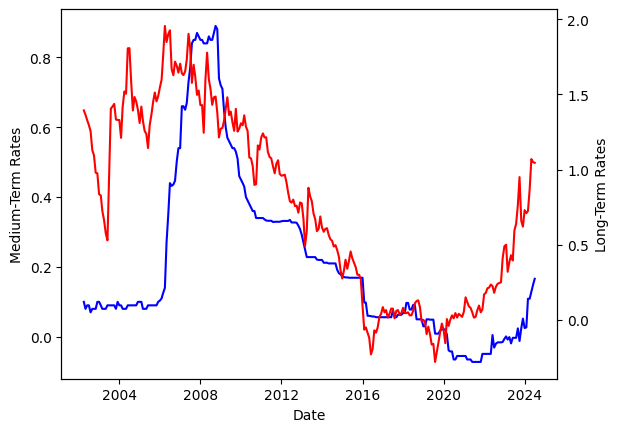

In [ ]:
sns.lineplot(x='Date', y='Medium-Term Rates', data=df, color='b')
ax2 = plt.twinx()
sns.lineplot(x='Date', y='Long-Term Rates', data=df, ax=ax2, color='r')
plt.show()

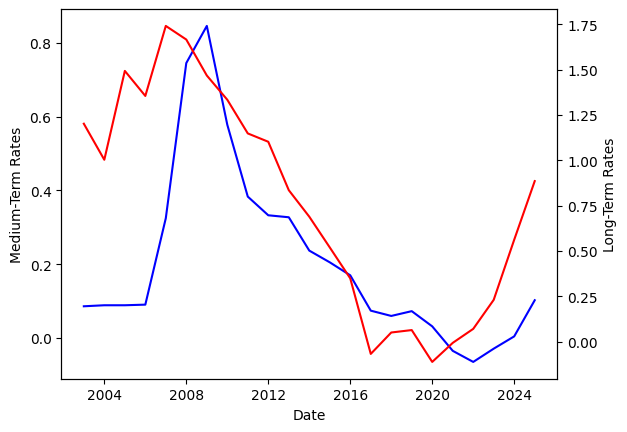

In [ ]:
sns.lineplot(x='Date', y='Medium-Term Rates', data=df_y, color='b')
ax2 = plt.twinx()
sns.lineplot(x='Date', y='Long-Term Rates', data=df_y, ax=ax2, color='r')
plt.show()

In [ ]:
df3 = df_y.pct_change().dropna()
df3

,Medium-Term Rates,Long-Term Rates
Date,,
2003-12-31,0.032468,-0.165195
2004-12-31,0.000000,0.487831
2005-12-31,0.018868,-0.092396
2006-12-31,2.607500,0.284739
2007-12-31,1.297169,-0.043091
2008-12-31,0.135196,-0.118983
2009-12-31,-0.316929,-0.091038
2010-12-31,-0.337176,-0.139019
2011-12-31,-0.132357,-0.039985


In [ ]:
df_4 = df4.pct_change().dropna()
df_4

,Medium-Term Rates,Long-Term Rates
Date,,
2006-05-01,0.928571,-0.054703
2006-06-01,0.296296,0.028123
2006-07-01,0.257143,0.013677
2006-08-01,-0.018182,-0.134406
2006-09-01,0.009259,-0.023981
2006-10-01,0.025229,0.055283
2006-11-01,0.123043,-0.016298
2006-12-01,0.075697,-0.026627
2007-01-01,0.000000,0.036474


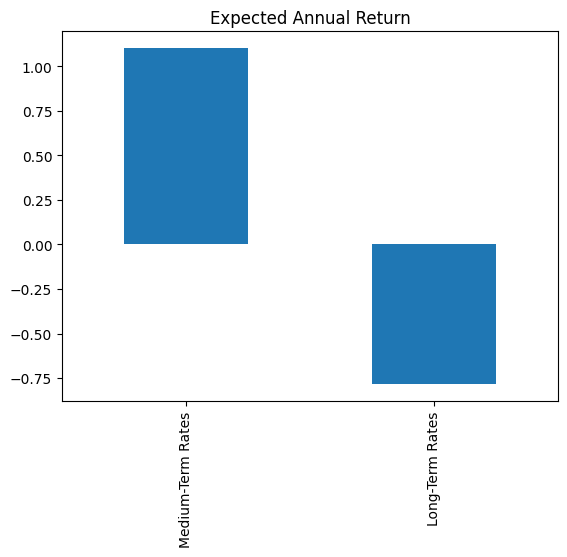

In [ ]:
# get yearly average return
e_r = df3.mean()

# plot exp return
e_r.plot(kind='bar')
plt.title('Expected Annual Return');

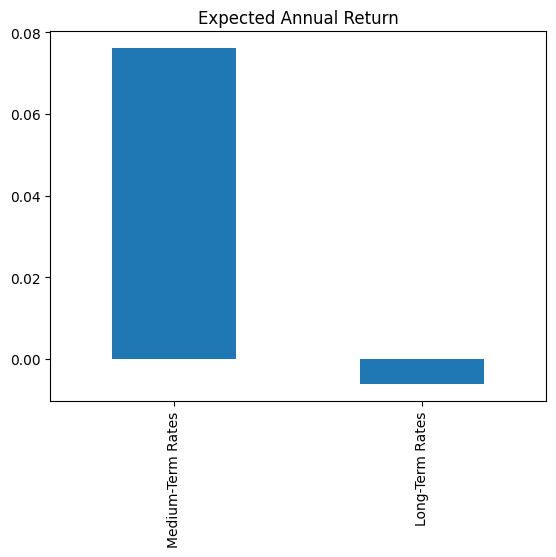

In [ ]:
# get yearly average return
e_r1 = df_4.mean()

# plot exp return
e_r1.plot(kind='bar')
plt.title('Expected Annual Return');

Text(0.5, 1.0, 'Standard Deviation (Volatility)')

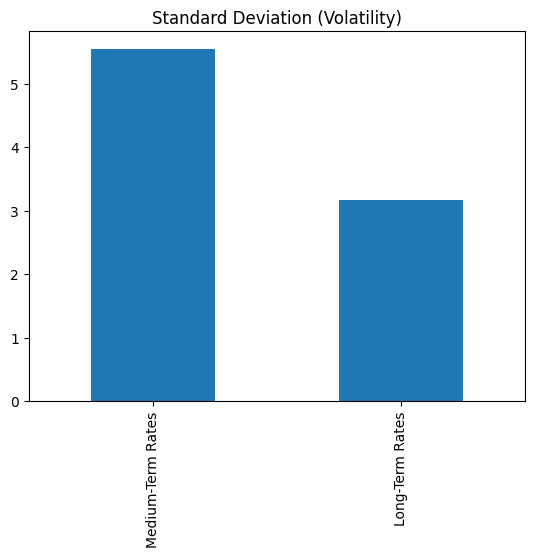

In [ ]:
sd = df3.std()
sd.plot(kind='bar')
plt.title('Standard Deviation (Volatility)')

Text(0.5, 1.0, 'Standard Deviation (Volatility)')

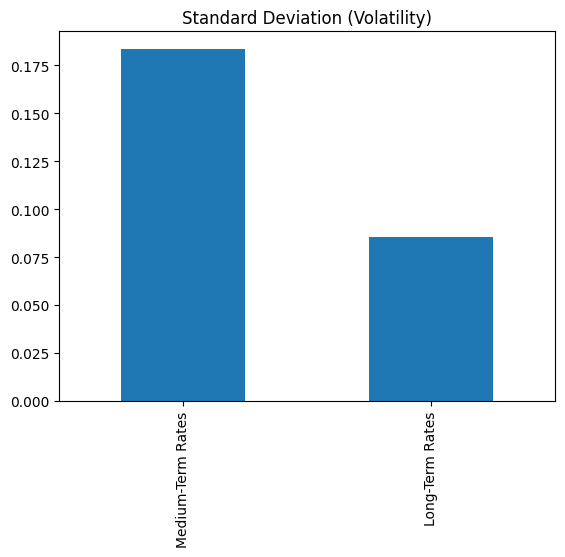

In [ ]:
sd1 = df_4.std()
sd1.plot(kind='bar')
plt.title('Standard Deviation (Volatility)')

<Axes: >

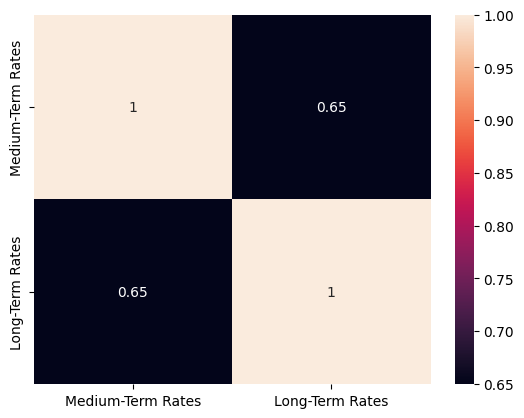

In [ ]:
cov_matrix = df3.cov()
cov_matrix
sns.heatmap(df.corr(),annot=True)

In [ ]:
w = np.array([1, 0])
p_r = np.sum(w*df3.mean())
p_r

cov_p = df3.cov()
cov_p

p_var = np.dot(np.transpose(w), cov_p.dot(w))
p_vol = np.sqrt(p_var)
print("Expected Portfolio Return is", p_r)
print("Expected Portfolio Variance is", p_var)
print("Expected Portfolio Volatility is", p_vol)

Expected Portfolio Return is 1.1015093673051155
Expected Portfolio Variance is 30.741822885198587
Expected Portfolio Volatility is 5.544530898570103


In [ ]:
w1 = np.array([1, 0])
p_r1 = np.sum(w1*df_4.mean())
p_r1

cov_p1 = df_4.cov()
cov_p1

p_var1 = np.dot(np.transpose(w1), cov_p1.dot(w1))
p_vol1 = np.sqrt(p_var1)
print("Expected Portfolio Return is", p_r1)
print("Expected Portfolio Variance is", p_var1)
print("Expected Portfolio Volatility is", p_vol1)

Expected Portfolio Return is 0.07608314559557396
Expected Portfolio Variance is 0.03365760201141093
Expected Portfolio Volatility is 0.1834600828829283


In [ ]:
num_assets = len(assets)
print(f' Total No. of Assets: {num_assets}')
print('------')

# function for finding sum array values
def sum_arr(num_arr):
    sum = 0

    for i in num_arr:
        sum = sum + i

    return(sum)

# create random weights for assets whose total equals 1
weights = np.random.random(num_assets)
weights /= np.sum(weights)
print(weights)

array_total = sum_arr(weights)
array_total

 Total No. of Assets: 2
------
[0.44300815 0.55699185]


1.0

In [ ]:
#Initialize an empty list for storing the portfolio returns
port_returns = []
#Initialize an empty list for storing the portfolio volatility
port_volatility = []
#Initialize an empty list for storing the portfolio weights
port_weights = []

for x in range(1000):
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
  port_returns.append(np.sum(weights*df3.mean()))
  port_volatility.append(np.sqrt(np.dot(np.transpose(weights), np.dot(df3.cov(), weights))))

port_returns = np.array(port_returns)
port_volatility = np.array(port_volatility)

portfolios = pd.DataFrame({'Return': port_returns, 'Volatility': port_volatility})
portfolios

#portfolios.index[df['Return'] == True].tolist()
#print(portfolios.idxmax())
#result = portfolios[portfolios['Return']]

,Return,Volatility
0,-0.304303,2.825611
1,0.109701,3.201941
2,0.007508,3.057521
3,0.406965,3.763531
4,-0.004226,3.042873
...,...,...
995,0.164448,3.290819
996,0.183333,3.323185
997,0.038012,3.097525
998,-0.276420,2.832066


In [ ]:
#Initialize an empty list for storing the portfolio returns
port_returns1 = []
#Initialize an empty list for storing the portfolio volatility
port_volatility1 = []
#Initialize an empty list for storing the portfolio weights
port_weights1 = []

for x in range(1000):
  weights1 = np.random.random(num_assets)
  weights1 /= np.sum(weights1)
  port_returns1.append(np.sum(weights1*df_4.mean()))
  port_volatility1.append(np.sqrt(np.dot(np.transpose(weights1), np.dot(df_4.cov(), weights1))))

port_returns1 = np.array(port_returns1)
port_volatility1 = np.array(port_volatility1)

portfolios1 = pd.DataFrame({'Return': port_returns1, 'Volatility': port_volatility1})
portfolios1

,Return,Volatility
0,0.033848,0.095995
1,0.035975,0.099471
2,0.042766,0.111605
3,0.037662,0.102348
4,0.034734,0.097422
...,...,...
995,0.073243,0.176891
996,0.037069,0.101325
997,0.073251,0.176910
998,0.047741,0.121286


<ipython-input-22-99a3a58459bf>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x=min_vol_port[1], y=min_vol_port[0], color='r', marker='*', s=200)
<ipython-input-22-99a3a58459bf>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x=max_ret_port[1], y=max_ret_port[0], color='g', marker='*', s=200)


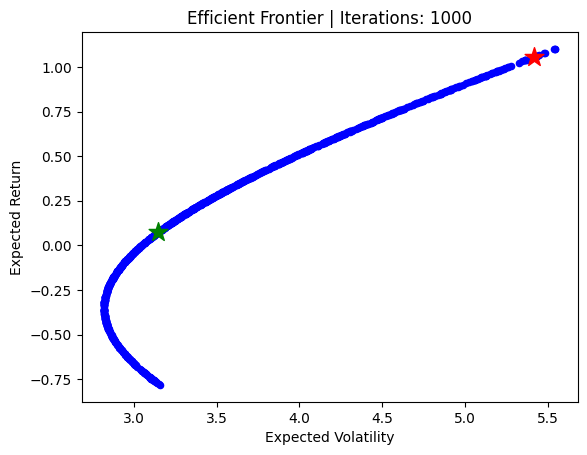

 The Least Risky Portfolio will return: 106%
 The Riskiest Portfolio will return: 7%


<ipython-input-22-99a3a58459bf>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f' The Least Risky Portfolio will return: {round(100*min_vol_port[0])}%')
<ipython-input-22-99a3a58459bf>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f' The Riskiest Portfolio will return: {round(100*max_ret_port[0])}%')


In [ ]:
# plot the Efficient Frontier of the given assets and portfolio values
portfolios.plot( x='Volatility', y='Return', kind='scatter', color='blue')
plt.title(f'Efficient Frontier | Iterations: 1000')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
min_vol_port = portfolios.loc[portfolios1['Volatility'].idxmin()]
max_ret_port = portfolios.loc[portfolios1['Return'].idxmax()]
plt.scatter(x=min_vol_port[1], y=min_vol_port[0], color='r', marker='*', s=200)
plt.scatter(x=max_ret_port[1], y=max_ret_port[0], color='g', marker='*', s=200)

plt.show()
print(f' The Least Risky Portfolio will return: {round(100*min_vol_port[0])}%')
print(f' The Riskiest Portfolio will return: {round(100*max_ret_port[0])}%')

<ipython-input-23-7a73f4c071e9>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x=min_vol_port1[1], y=min_vol_port1[0], color='r', marker='*', s=200)
<ipython-input-23-7a73f4c071e9>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x=max_ret_port1[1], y=max_ret_port1[0], color='g', marker='*', s=200)


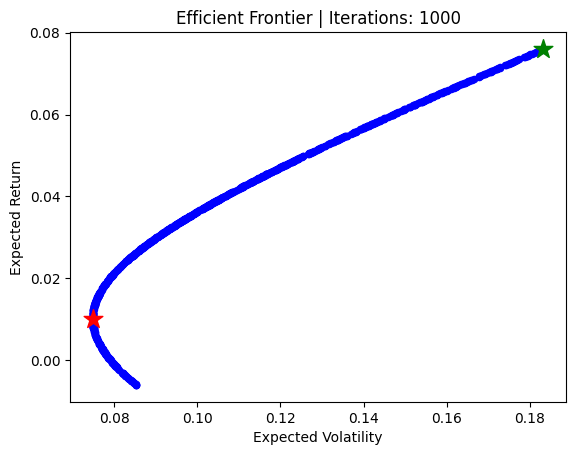

 The Least Risky Portfolio will return: 1%
 The Riskiest Portfolio will return: 8%


<ipython-input-23-7a73f4c071e9>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f' The Least Risky Portfolio will return: {round(100*min_vol_port1[0])}%')
<ipython-input-23-7a73f4c071e9>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f' The Riskiest Portfolio will return: {round(100*max_ret_port1[0])}%')


In [ ]:
# plot the Efficient Frontier of the given assets and portfolio values
portfolios1.plot( x='Volatility', y='Return', kind='scatter', color='blue')
plt.title(f'Efficient Frontier | Iterations: 1000')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
min_vol_port1 = portfolios1.loc[portfolios1['Volatility'].idxmin()]
max_ret_port1 = portfolios1.loc[portfolios1['Return'].idxmax()]
plt.scatter(x=min_vol_port1[1], y=min_vol_port1[0], color='r', marker='*', s=200)
plt.scatter(x=max_ret_port1[1], y=max_ret_port1[0], color='g', marker='*', s=200)

plt.show()
print(f' The Least Risky Portfolio will return: {round(100*min_vol_port1[0])}%')
print(f' The Riskiest Portfolio will return: {round(100*max_ret_port1[0])}%')